In [1]:
%cd ..

/home/ozo/workspace/hydra-diffusion


## Denoising Diffusion Probabilistic Models

In [7]:
import torch
import pytorch_lightning as pl
from src.models.mnist_module import MNISTLitModule
from src.models.conditional_diffusion_module import ConditionalDiffusionModule
from torch.utils.data import DataLoader
import imageio
import numpy as np
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

### Set model parameters

In [3]:
# Training hyperparameters
diffusion_steps = 1000

### Load pretrained model

In [4]:
# last_checkpoint = "/home/ozo/workspace/hydra-diffusion/logs/train/runs/2023-06-27_13-28-04/checkpoints/last.ckpt"
# last_checkpoint = "/home/ozo/workspace/hydra-diffusion/logs/train/runs/2023-06-27_21-52-26/checkpoints/last.ckpt"
last_checkpoint = "/home/ozo/workspace/hydra-diffusion/logs/train/runs/2023-06-28_13-15-50/checkpoints/last.ckpt"
last_conditional_checkpoint = "/home/ozo/workspace/hydra-diffusion/logs/train/runs/2023-07-04_12-43-12/checkpoints/last.ckpt"

In [8]:
model = MNISTLitModule.load_from_checkpoint(last_checkpoint, in_size=1, t_range=diffusion_steps, img_channels=1).net
conditional_model = ConditionalDiffusionModule.load_from_checkpoint(last_conditional_checkpoint, in_size=1, t_range=diffusion_steps, img_channels=1, num_classes=10).net

### Sample from Diffusion Models

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([30, 5, 5, 32, 32, 1])


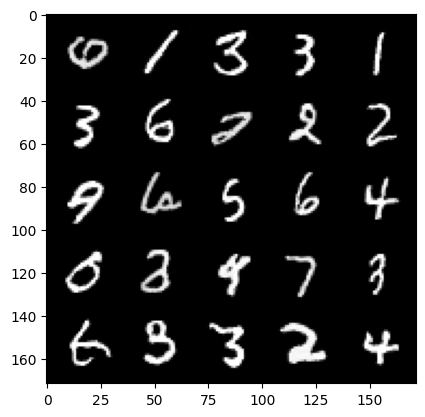

In [ ]:
gif_shape = [5, 5]
sample_batch_size = gif_shape[0] * gif_shape[1]
n_hold_final = 10

# Generate samples from denoising process
gen_samples = []
model = model.to("cpu")
x = torch.randn((sample_batch_size, 1, 32, 32)).to("cpu")
sample_steps = torch.arange(model.t_range - 1, 0, -1)
for t in sample_steps:
    x = model.denoise_sample(x, t)
    if t % 50 == 0 or t == 1:
        gen_samples.append(x)

for _ in range(n_hold_final):
    gen_samples.append(x)
gen_samples = torch.stack(gen_samples, dim=0).moveaxis(2, 4).squeeze(-1) # [30, 5, 32, 32]
gen_samples = gen_samples.reshape(-1, gif_shape[0], gif_shape[1], 32, 32, 1) # [30, 1, 5, 32, 32, 1]
# img = gen_samples[0][0]
# x = x.moveaxis(1, 3)
img = make_grid(x, nrow=gif_shape[0])
import matplotlib.pyplot as plt
print(gen_samples.shape)
plt.imshow(img.moveaxis(0,2).detach().numpy(), cmap="gray")
plt.show()
# for _ in range(n_hold_final):
#     gen_samples.append(x)
# gen_samples = (gen_samples.clamp(-1, 1) + 1) / 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

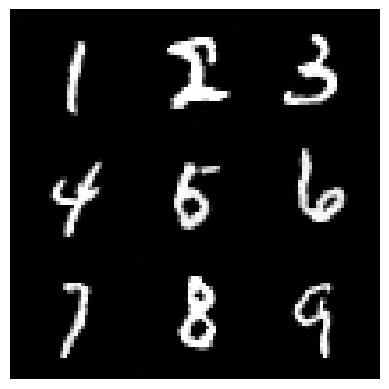

In [17]:
fig = plt.figure()
plt.axis("off")
ims = [[plt.imshow(make_grid(i.reshape(-1, 32, 32, 1).moveaxis(3, 1), nrow=gif_shape[0]).moveaxis(0, 2).detach().numpy(), cmap='gray', animated=True)] for i in gen_samples]
ani = animation.ArtistAnimation(fig, ims, interval=250, repeat_delay=1000, blit=True)

# HTML(ani.to_jshtml())
ani.save("outputs/mnist.gif", writer="imagemagick")

### Sample from Conditional Diffusion Models

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([30, 3, 3, 32, 32, 1])


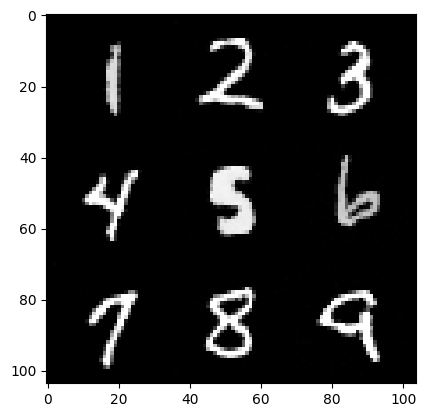

In [19]:
gif_shape = [3, 3]
sample_batch_size = gif_shape[0] * gif_shape[1]
n_hold_final = 10

# Generate samples from denoising process
gen_samples = []
conditional_model = conditional_model.to("cpu")
x = torch.randn((sample_batch_size, 1, 32, 32)).to("cpu")
sample_steps = torch.arange(conditional_model.t_range - 1, 0, -1)
for t in sample_steps:
    x = conditional_model.denoise_sample(x, t, torch.arange(1, 10, 1))
    if t % 50 == 0 or t == 1:
        gen_samples.append(x)

for _ in range(n_hold_final):
    gen_samples.append(x)
gen_samples = torch.stack(gen_samples, dim=0).moveaxis(2, 4).squeeze(-1) # [30, 5, 32, 32]
gen_samples = gen_samples.reshape(-1, gif_shape[0], gif_shape[1], 32, 32, 1) # [30, 1, 5, 32, 32, 1]
# img = gen_samples[0][0]
# x = x.moveaxis(1, 3)
img = make_grid(x, nrow=gif_shape[0])
import matplotlib.pyplot as plt
print(gen_samples.shape)
plt.imshow(img.moveaxis(0,2).detach().numpy(), cmap="gray")
plt.show()
# for _ in range(n_hold_final):
#     gen_samples.append(x)
# gen_samples = (gen_samples.clamp(-1, 1) + 1) / 2

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

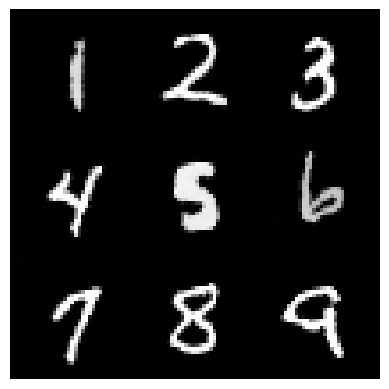

In [20]:
fig = plt.figure()
plt.axis("off")
ims = [[plt.imshow(make_grid(i.reshape(-1, 32, 32, 1).moveaxis(3, 1), nrow=gif_shape[0]).moveaxis(0, 2).detach().numpy(), cmap='gray', animated=True)] for i in gen_samples]
ani = animation.ArtistAnimation(fig, ims, interval=250, repeat_delay=1000, blit=True)

# HTML(ani.to_jshtml())
ani.save("outputs/conditional_mnist.gif", writer="imagemagick")